In [16]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

In [18]:
cancer = load_breast_cancer()

malignant = cancer.data[cancer.target == 1]
benign = cancer.data[cancer.target == 0]

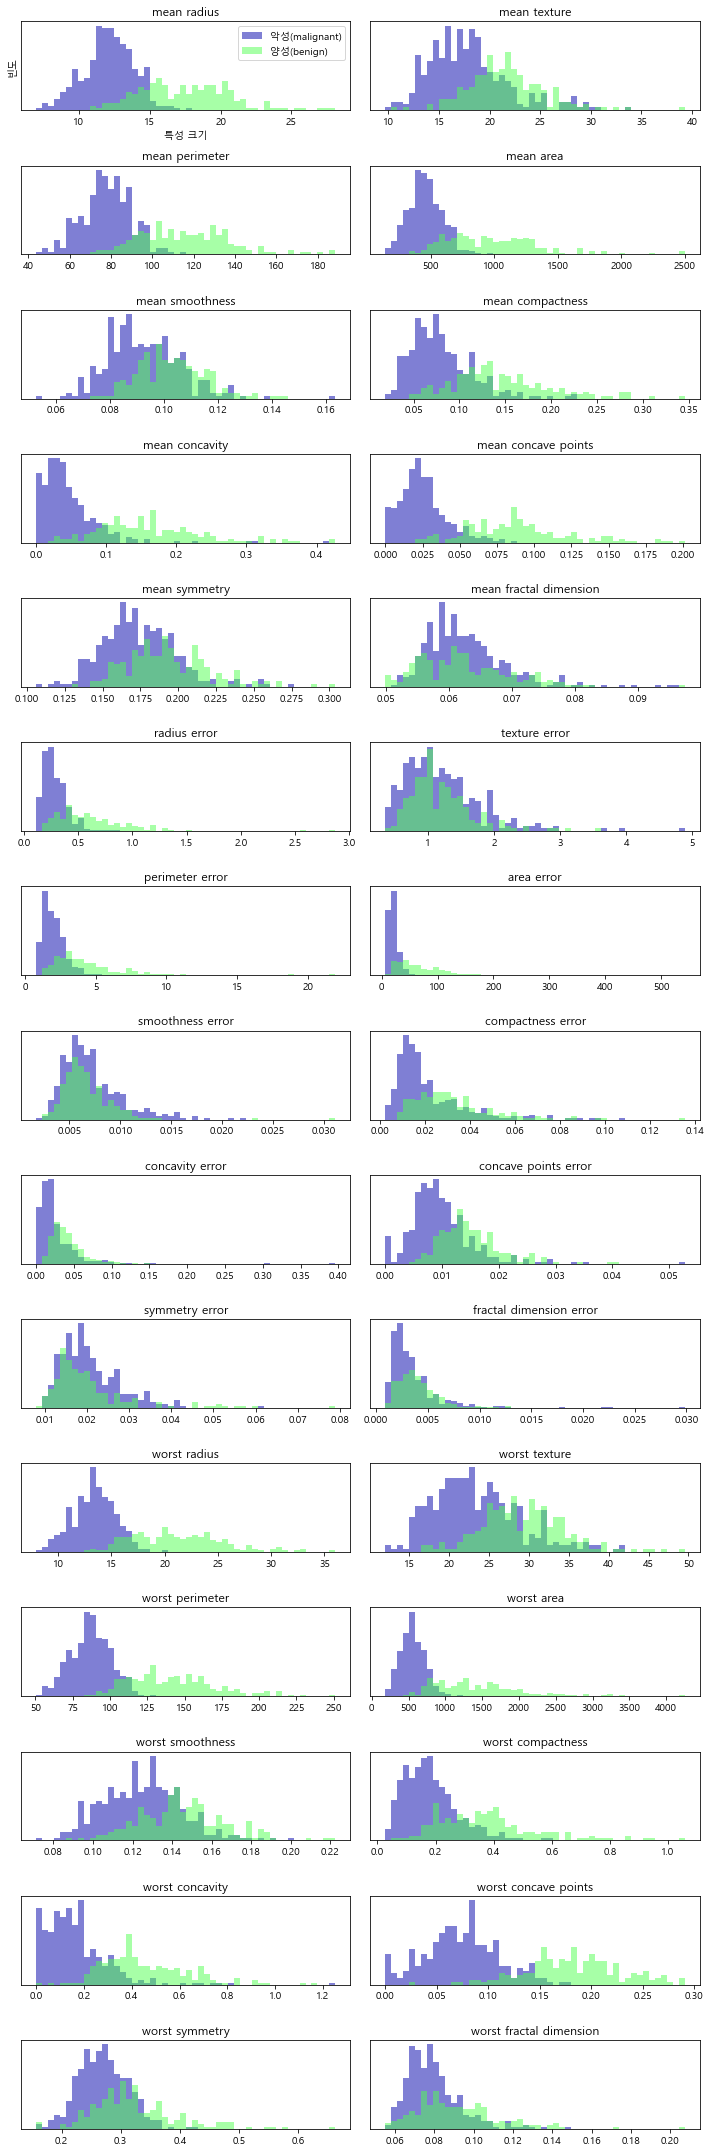

In [19]:
import mglearn

fig, axes = plt.subplots(15, 2, figsize=(10, 30))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성(malignant)", "양성(benign)"], loc="best")
fig.tight_layout()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
scaler =StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
print(X_scaled[:,0].mean(),X_scaled[:,0].var())
X_scaled[0]

-3.153111437248248e-15 0.9999999999999996


array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [30]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("원본, PCA변형", X_scaled.shape, X_pca.shape)

원본, PCA변형 (569, 30) (569, 2)


Text(0, 0.5, '두 번째 주성분')

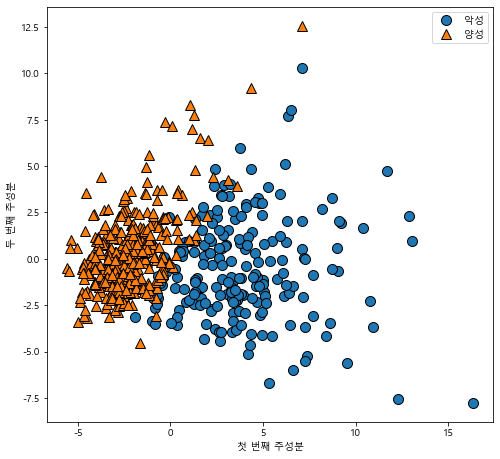

In [31]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 표시
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [32]:
print("PCA 주성분 형태 ", pca.components_.shape)
print("PCA 주성분 :", pca.components_) # 두개의 주성분에 대한 결합- 회귀 계수

PCA 주성분 형태  (2, 30)
PCA 주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

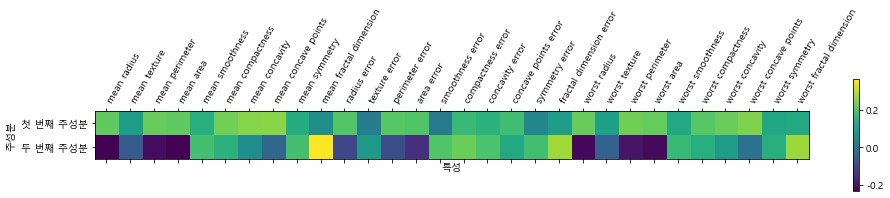

In [33]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [34]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Text(0, 0.5, '주성분')

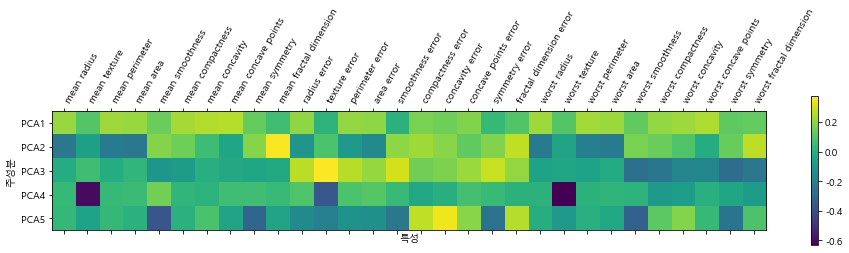

In [35]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1,2,3,4], ["PCA1", "PCA2","PCA3","PCA4","PCA5"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [36]:
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [37]:
iris = sns.load_dataset("iris")

X_iris = iris.drop("species", axis=1)
y_iris = iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [38]:
model = PCA()
X_pca_dat = model.fit(X_iris).transform(X_iris)
print(X_pca_dat.shape, type(X_pca_dat) )

(150, 4) <class 'numpy.ndarray'>


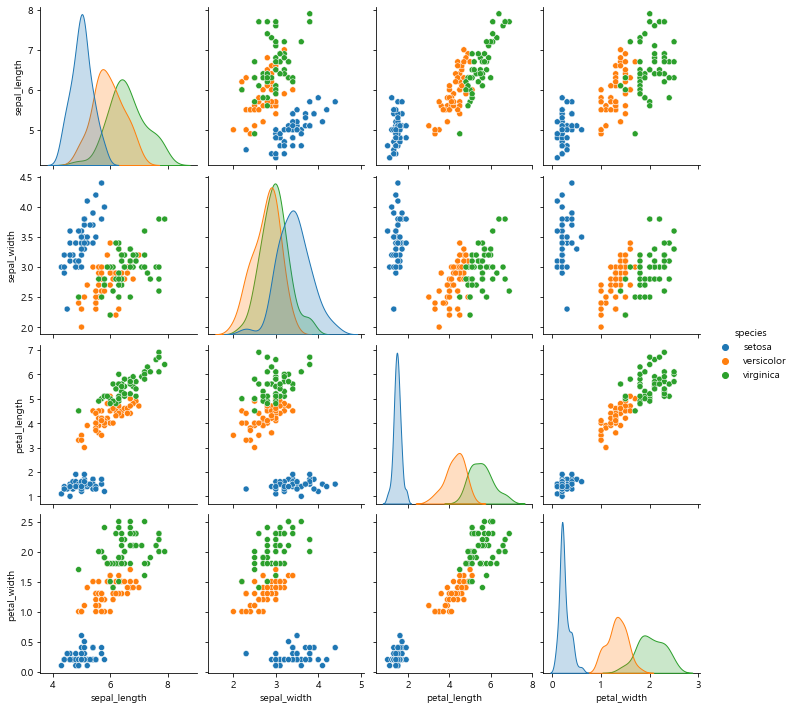

In [39]:
sns.pairplot(hue='species',data=iris)

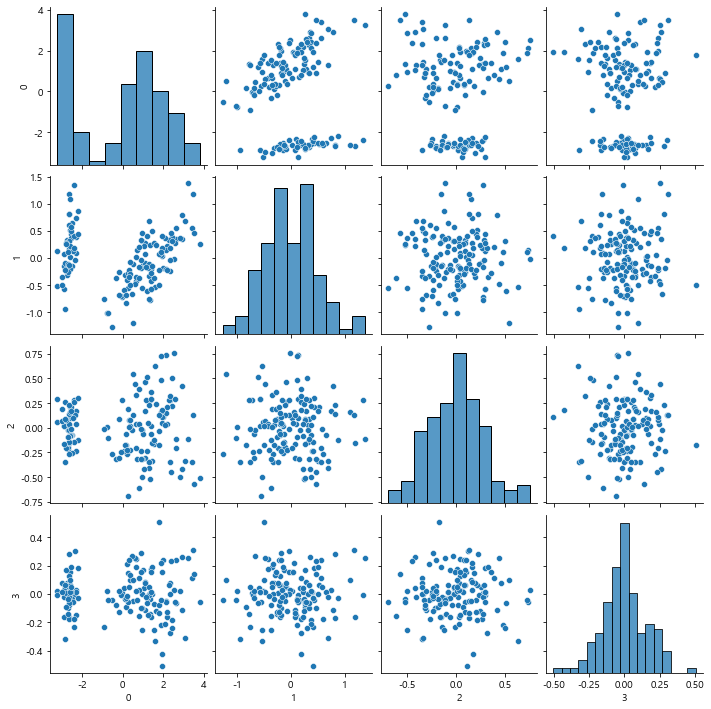

In [40]:
import pandas as pd

df = pd.DataFrame(X_pca_dat[0:,0:])
sns.pairplot(df)

In [41]:
model = PCA(n_components=2)
X_pca2 = model.fit(X_iris).transform(X_iris)
print(X_pca2.shape, type(X_pca_dat) )
print(X_pca2)

(150, 2) <class 'numpy.ndarray'>
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


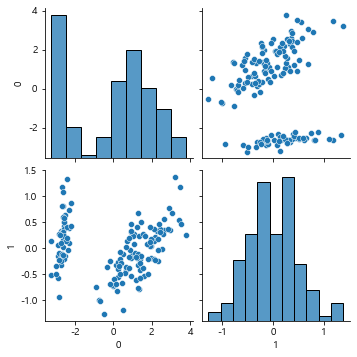

In [42]:
# df = pd.DataFrame(X_pca2[0:,0:])
df = pd.DataFrame(X_pca2)
sns.pairplot(df)
df.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


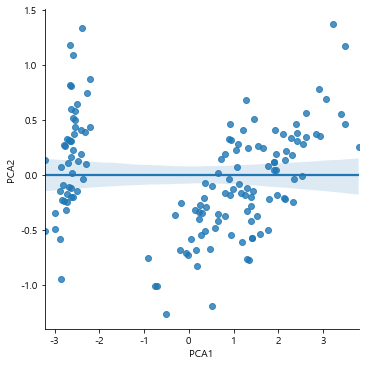

In [43]:
iris['PCA1'] = df.iloc[:,0]  # feature 생성
iris['PCA2'] = df.iloc[:,1]  # feature 생성
sns.lmplot('PCA1', 'PCA2', data=iris, fit_reg=True)

In [44]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2
sepal_length,1.000000,-0.117570,0.871754,0.817941,8.974018e-01,3.906044e-01
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-3.987485e-01,8.252287e-01
petal_length,0.871754,-0.428440,1.000000,0.962865,9.978739e-01,-4.838060e-02
petal_width,0.817941,-0.366126,0.962865,1.000000,9.665475e-01,-4.878160e-02
PCA1,0.897402,-0.398748,0.997874,0.966548,1.000000e+00,9.257390e-16
PCA2,0.390604,0.825229,-0.048381,-0.048782,9.257390e-16,1.000000e+00


In [46]:
from sklearn.model_selection import train_test_split
X = cancer.data[:, 0:4]
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

NameError: name 'DecisionTreeClassifier' is not defined